In [3]:
# Problem Set 6: Simulating robots
# Name:
# Collaborators:
# Time:

import math
import random

import ps6_visualize
import pylab

# === Provided classes

class Position(object):
    """
    A Position represents a location in a two-dimensional room.
    """
    def __init__(self, x, y):
        """
        Initializes a position with coordinates (x, y).
        """
        self.x = x
        self.y = y
    def getX(self):
        return self.x
    def getY(self):
        return self.y
    def getNewPosition(self, angle, speed):
        """
        Computes and returns the new Position after a single clock-tick has
        passed, with this object as the current position, and with the
        specified angle and speed.

        Does NOT test whether the returned position fits inside the room.

        angle: float representing angle in degrees, 0 <= angle < 360
        speed: positive float representing speed

        Returns: a Position object representing the new position.
        """
        old_x, old_y = self.getX(), self.getY()
        # Compute the change in position
        delta_y = speed * math.cos(math.radians(angle))
        delta_x = speed * math.sin(math.radians(angle))
        # Add that to the existing position
        new_x = old_x + delta_x
        new_y = old_y + delta_y
        return Position(new_x, new_y)

In [4]:
# === Problems 1

class RectangularRoom(object):
#     """
#     A RectangularRoom represents a rectangular region containing clean or dirty
#     tiles.

#     A room has a width and a height and contains (width * height) tiles. At any
#     particular time, each of these tiles is either clean or dirty.
#     """
    def __init__(self, width, height):
#         """
#         Initializes a rectangular room with the specified width and height.

#         Initially, no tiles in the room have been cleaned.

#         width: an integer > 0
#         height: an integer > 0
#         """
        assert type(width) == int 
        assert width > 0
        assert type(height) == int
        assert height > 0
        self.width = width
        self.height = height
        self.ctiles = []
    
    def cleanTileAtPosition(self, pos):
#         """
#         Mark the tile under the position POS as cleaned.

#         Assumes that POS represents a valid position inside this room.

#         pos: a Position
#         """
        self.ctile = (int(pos.getX()), int(pos.getY()))
        self.ctiles.append(self.ctile)
    
    def isTileCleaned(self, m, n):
#         """
#         Return True if the tile (m, n) has been cleaned.

#         Assumes that (m, n) represents a valid tile inside the room.

#         m: an integer
#         n: an integer
#         returns: True if (m, n) is cleaned, False otherwise
#         """
        return (m, n) in self.ctiles 
    
    def getNumTiles(self):
#         """
#         Return the total number of tiles in the room.

#         returns: an integer
#         """
        return self.width * self.height
    
    def getNumCleanedTiles(self):
#         """
#         Return the total number of clean tiles in the room.

#         returns: an integer
#         """
        return len(self.ctiles)

    def getRandomPosition(self):
#         """
#         Return a random position inside the room.

#         returns: a Position object.
#         """
        x = random.uniform(0, self.width)
        y = random.uniform(0, self.height)
        return Position(x, y)

    def isPositionInRoom(self, pos):
#         """
#         Return True if pos is inside the room.

#         pos: a Position object.
#         returns: True if pos is in the room, False otherwise.
#         """
        return (0 < pos.getX() < float(self.width)) and (0 < pos.getY() < float(self.height))

In [5]:
class Robot(object):
    """
    Represents a robot cleaning a particular room.

    At all times the robot has a particular position and direction in the room.
    The robot also has a fixed speed.

    Subclasses of Robot should provide movement strategies by implementing
    updatePositionAndClean(), which simulates a single time-step.
    """
    def __init__(self, room, speed):
#         """
#         Initializes a Robot with the given speed in the specified room. The
#         robot initially has a random direction and a random position in the
#         room. The robot cleans the tile it is on.
#         room:  a RectangularRoom object.
#         speed: a float (speed > 0)
#         """
        assert type(speed) == float
        assert speed > 0
        self.room = room
        self.speed = speed
        self.direction = random.randint(0, 360)
        self.pos = self.room.getRandomPosition()
        if not self.room.isTileCleaned(int(self.pos.getX()), int(self.pos.getY())):
            self.room.cleanTileAtPosition(self.pos)

    def getRobotPosition(self):
#         """
#         Return the position of the robot.

#         returns: a Position object giving the robot's position.
#         """
        x = self.pos.getX()
        y = self.pos.getY()
        return Position(x, y)
    
    def getRobotDirection(self):
#         """
#         Return the direction of the robot.

#         returns: an integer d giving the direction of the robot as an angle in
#         degrees, 0 <= d < 360.
#         """
        return self.direction

    def setRobotPosition(self, position):
#         """
#         Set the position of the robot to POSITION.

#         position: a Position object.
#         """
        self.pos = position
        
    def setRobotDirection(self, direction):
#         """
#         Set the direction of the robot to DIRECTION.

#         direction: integer representing an angle in degrees
#         """
        self.direction = direction

    def updatePositionAndClean(self):
#         """
#         Simulate the raise passage of a single time-step.

#         Move the robot to a new position and mark the tile it is on as having
#         been cleaned.
#         """
        self.pos = self.pos.getNewPosition(float(self.direction), self.speed)
        if not self.room.isTileCleaned(int(self.pos.getX()), int(self.pos.getY())):
            self.room.cleanTileAtPosition(self.pos)

In [6]:
# === Problem 2
class StandardRobot(Robot):
#     """
#     A StandardRobot is a Robot with the standard movement strategy.

#     At each time-step, a StandardRobot attempts to move in its current direction; when
#     it hits a wall, it chooses a new direction randomly.
#     """
    def updatePositionAndClean(self):
#         """
#         Simulate the passage of a single time-step.

#         Move the robot to a new position and mark the tile it is on as having
#         been cleaned.
#         """
        new_pos = self.pos.getNewPosition(float(self.direction), self.speed)
        if self.room.isPositionInRoom(new_pos):
            self.pos = new_pos
        else:
            while not self.room.isPositionInRoom(new_pos):
                self.direction = random.randint(0,360)
                new_pos = self.pos.getNewPosition(float(self.direction), self.speed)
            self.pos = new_pos
        if not self.room.isTileCleaned(int(self.pos.getX()), int(self.pos.getY())):
            self.room.cleanTileAtPosition(self.pos)

In [7]:
import ps6_visualize

In [8]:
# === Problem 3

def runSimulation(num_robots, speed, width, height, min_coverage, num_trials,
                  robot_type):
#     """
#     Runs NUM_TRIALS trials of the simulation and returns the mean number of
#     time-steps needed to clean the fraction MIN_COVERAGE of the room.

#     The simulation is run with NUM_ROBOTS robots of type ROBOT_TYPE, each with
#     speed SPEED, in a room of dimensions WIDTH x HEIGHT.

#     num_robots: an int (num_robots > 0)
#     speed: a float (speed > 0)
#     width: an int (width > 0)
#     height: an int (height > 0)
#     min_coverage: a float (0 <= min_coverage <= 1.0)
#     num_trials: an int (num_trials > 0)
#     robot_type: class of robot to be instantiated (e.g. Robot or
#                 RandomWalkRobot)
#     """
    assert type(num_robots) == int and num_robots > 0     
    steps_list = []
    for trial in range (1, num_trials + 1):    
#         anim = ps6_visualize.RobotVisualization(num_robots, width, height)    ## uncomment this to visualize
        robots = []
        steps = 0
        room = RectangularRoom(width, height)
        coverage = (room.getNumCleanedTiles())/(room.getNumTiles())
        for i in range (1, (num_robots + 1)):
            robot = robot_type(room, speed)
            coverage = (room.getNumCleanedTiles())/(room.getNumTiles())
            robots.append(robot)
        while coverage < min_coverage: 
            for robot in robots:
                robot.updatePositionAndClean()
            coverage = (room.getNumCleanedTiles())/(room.getNumTiles())
            steps +=1
#             anim.update(room, robots)     ## uncomment this to visualize
        steps_list.append(steps)
#         anim.done()        ## uncomment this to visualize
    return sum(steps_list)/len(steps_list)

In [11]:
runSimulation(10, 1.0, 20, 20, 0.9, 30, StandardRobot)

101.0

In [172]:
runSimulation(1, 1.0, 10, 10, 0.9, 30, StandardRobot)

244.56666666666666

In [173]:
runSimulation(1, 1.0, 20, 20, 1.0, 30, StandardRobot)

2966.9

In [12]:
# uncomment anim line in runSimulation and reduce num_trials to visualize

In [13]:
import pylab

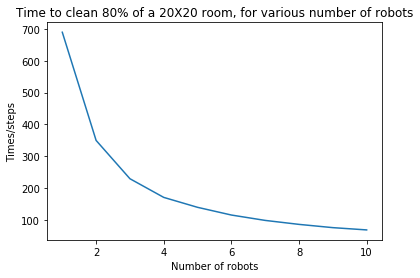

In [26]:
# === Problem 4
#
# 1) How long does it take to clean 80% of a 20×20 room with each of 1-10 robots?
#
# 2) How long does it take two robots to clean 80% of rooms with dimensions 
#	 20×20, 25×16, 40×10, 50×8, 80×5, and 100×4?

def showPlot1():
#     """
#     Produces a plot showing dependence of cleaning time on number of robots.
#     """ 
    avg_times = []
    n_robots = []
    for number in range (1, 11):
        avg = runSimulation(number, 1.0, 20, 20, 0.8, 100, StandardRobot) 
        avg_times.append(avg)
        n_robots.append(number)
    pylab.figure(1)
    pylab.plot(n_robots, avg_times)
    pylab.title('Time to clean 80% of a 20X20 room, for various number of robots')
    pylab.xlabel('Number of robots')
    pylab.ylabel('Times/steps')
    pylab.savefig('showPlot1')

showPlot1()    
pylab.show()

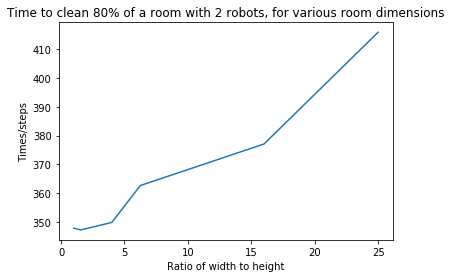

In [25]:
 def showPlot2():
#     """
#     Produces a plot showing dependence of cleaning time on room shape.
#     """
    widths = [20, 25, 40, 50, 80, 100]
    heights = [20, 16, 10, 8, 5, 4]
    ratios = []
    avg_times = []
    for size in range (0, len(widths)):
        avg = runSimulation(2, 1.0, widths[size], heights[size], 0.8, 200, StandardRobot) 
        avg_times.append(avg)
        ratios.append(widths[size]/heights[size])
    pylab.figure(2)
    pylab.plot(ratios, avg_times)
    pylab.title('Time to clean 80% of a room with 2 robots, for various room dimensions')
    pylab.xlabel('Ratio of width to height')
    pylab.ylabel('Times/steps')
    pylab.savefig('showPlot2')

showPlot2()    
pylab.show()

In [27]:
# === Problem 5

class RandomWalkRobot(Robot):
#     """
#     A RandomWalkRobot is a robot with the "random walk" movement strategy: it
#     chooses a new direction at random after each time-step.
#     """

    def updatePositionAndClean(self):
        self.direction = random.randint(0,360)
        new_pos = self.pos.getNewPosition(float(self.direction), self.speed)
        if self.room.isPositionInRoom(new_pos):
            self.pos = new_pos
        else:
            while not self.room.isPositionInRoom(new_pos):
                self.direction = random.randint(0,360)
                new_pos = self.pos.getNewPosition(float(self.direction), self.speed)
            self.pos = new_pos
        if not self.room.isTileCleaned(int(self.pos.getX()), int(self.pos.getY())):
            self.room.cleanTileAtPosition(self.pos)

In [29]:
runSimulation(10, 1.0, 10, 10, 0.9, 30, RandomWalkRobot)

44.266666666666666

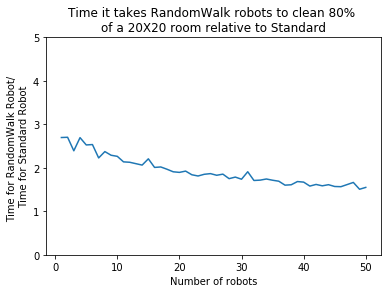

In [36]:
# === Problem 6

# For the parameters tested below (cleaning 80% of a 20x20 square room),
# RandomWalkRobots take approximately twice as long to clean the same room as
# StandardRobots do.

def showPlot3():
#     """
#     Produces a plot comparing the two robot strategies.
#     """
    ratios = []
    n_robots = []
    for number in range (1, 51):
        avg_stand = runSimulation(number, 1.0, 20, 20, 0.8, 30, StandardRobot) 
        avg_random = runSimulation(number, 1.0, 20, 20, 0.8, 30, RandomWalkRobot)
        ratios.append(avg_random/avg_stand)
        n_robots.append(number)
    pylab.figure(3)
    pylab.plot(n_robots, ratios)
    pylab.title('Time it takes RandomWalk robots to clean 80% \n'
                'of a 20X20 room relative to Standard')
    pylab.xlabel('Number of robots')
    pylab.ylabel('Time for RandomWalk Robot/ \n'
                 'Time for Standard Robot')
    pylab.ylim(0, 5) 
    pylab.savefig('showPlot3')

showPlot3()    
pylab.show()
